<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int6

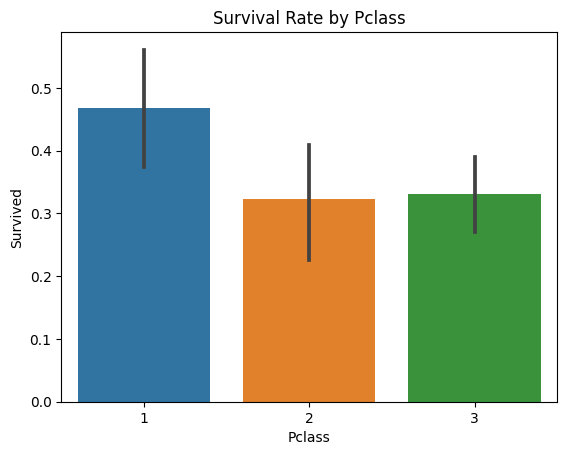

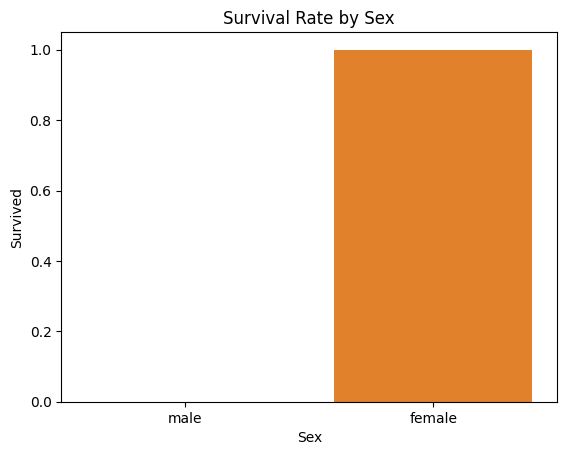

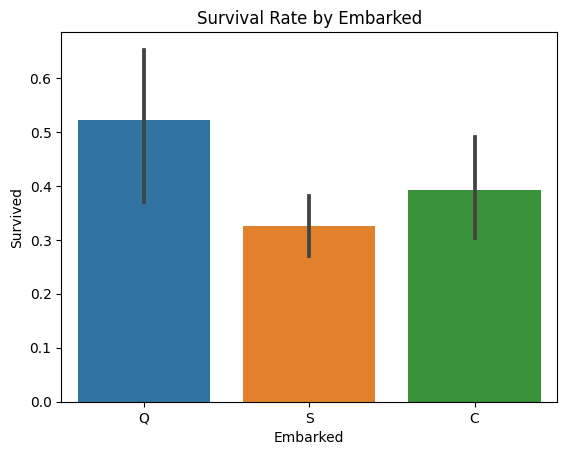

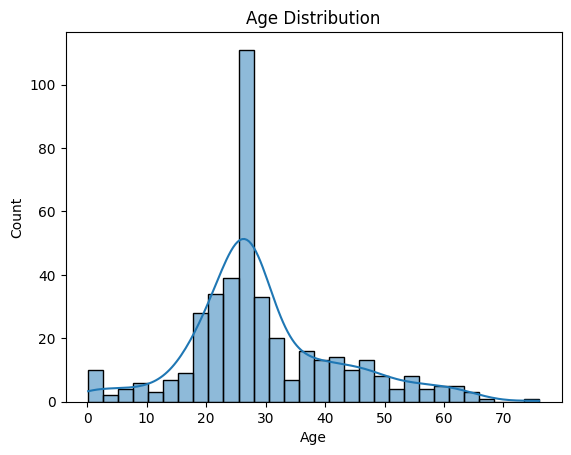

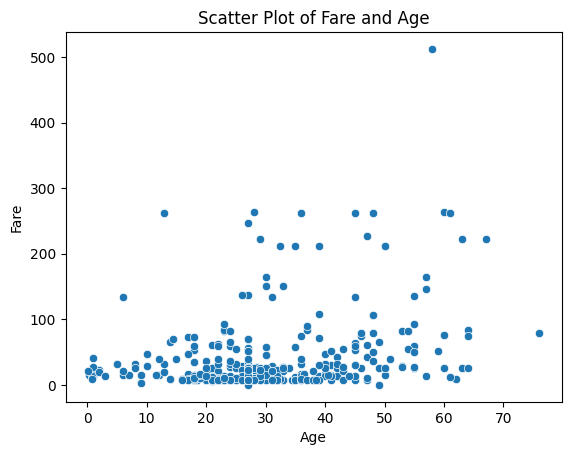

ValueError: could not convert string to float: 'male'

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_df = pd.read_csv('test.csv')
titanic_df2 = pd.read_csv('gender_submission.csv')

titanic_df = pd.merge(titanic_df, titanic_df2, on='PassengerId', how='left')

# Display basic information about the merged dataset
print(titanic_df.info())

# Check for missing values after the merge
print(titanic_df.isnull().sum())

# Fill missing values in the 'Survived' column (if any)
titanic_df['Survived'].fillna(0, inplace=True)  # Fill NaN with 0, assuming non-survived for missing values

# Display the first few rows of the merged dataset
print(titanic_df.head())

# Impute missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
titanic_df = titanic_df.drop(['Cabin', 'Name', 'Ticket'], axis=1)

# Explore relationships between variables
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarked')
plt.show()

# Age distribution
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Scatter plot of Fare and Age
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('Scatter Plot of Fare and Age')
plt.show()

# Correlation heatmap
numeric_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = titanic_df[numeric_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()